# README
Here, we increase the nsteps from 512 to 2048.

and add a new hidden layer for policy and value networks.

# version
    commit 92c97e849156d9431e354b5f4bef45006c593a7d
    Author: kailiko <inksci@qq.com>
    Date:   Sun Mar 21 20:09:09 2021 +0800

        nsteps & ly3

    diff --git a/agent.py b/agent.py
    index be735b2..634597d 100644
    --- a/agent.py
    +++ b/agent.py
    @@ -117,7 +117,7 @@ class Agent():

         def step_train(self):

    -        nsteps = 512
    +        nsteps = 2048
             nbatch_train = 64

             # Get minibatch
    diff --git a/policy.py b/policy.py
    index 87c816f..b20abc2 100644
    --- a/policy.py
    +++ b/policy.py
    @@ -34,8 +34,9 @@ class Policy(object):
             with tf.variable_scope('policy'):

                 ly1 = tf.layers.dense(state, 64, activation=tf.nn.relu, name='ly1')
    -            ly2 = tf.layers.dense(ly1, act_dim, activation=None, name='ly2')
    -            action_nodes = ly2
    +            ly2 = tf.layers.dense(ly1, 64, activation=tf.nn.relu, name='ly2')
    +            ly3 = tf.layers.dense(ly2, act_dim, activation=None, name='ly3')
    +            action_nodes = ly3

                 # action head
                 mean = action_nodes
    diff --git a/value_net.py b/value_net.py
    index 3959ddf..d78fb1d 100644
    --- a/value_net.py
    +++ b/value_net.py
    @@ -6,6 +6,7 @@ def value_nn(state, obs_dim):
         with tf.variable_scope('value'):

             ly1 = tf.layers.dense(state, 64, activation=tf.nn.relu, name='ly1')
    -        ly2 = tf.layers.dense(ly1, 1, activation=None, name='ly2')
    -        ly2 = tf.reshape(ly2, [-1])
    -        return ly2
    +        ly2 = tf.layers.dense(ly1, 64, activation=tf.nn.relu, name='ly2')
    +        ly3 = tf.layers.dense(ly2, 1, activation=None, name='ly3')
    +        ly3 = tf.reshape(ly3, [-1])
    +        return ly3


In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output
import time
from tqdm import trange

from ppo_pendulum.agent import Agent

In [2]:
agent = Agent()

W0320 07:26:11.380264 139909241722688 deprecation_wrapper.py:119] From /media/inksci/file/deepolicy/gym-envs/ppo_pendulum/sampler.py:37: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0320 07:26:11.381324 139909241722688 deprecation_wrapper.py:119] From /media/inksci/file/deepolicy/gym-envs/ppo_pendulum/sampler.py:37: The name tf.AUTO_REUSE is deprecated. Please use tf.compat.v1.AUTO_REUSE instead.

W0320 07:26:11.399030 139909241722688 deprecation_wrapper.py:119] From /media/inksci/file/deepolicy/gym-envs/ppo_pendulum/policy.py:24: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0320 07:26:11.401078 139909241722688 deprecation.py:323] From /media/inksci/file/deepolicy/gym-envs/ppo_pendulum/policy.py:36: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.
W0320 07:26:11.408237 139909241722688 deprecat

100%|██████████| 1500/1500 [34:11<00:00,  1.37s/it]


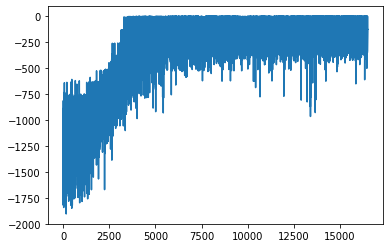

In [3]:
for _ in trange(1500):
    '''
    100/100 [00:39<00:00,  2.55it/s]
    1000/1000 [05:58<00:00,  2.79it/s]
    3000/3000 [19:25<00:00,  2.58it/s]
    '''
    
    agent.step_train()

plt.plot(agent.sampler.ep_total_reward_list)
plt.show()

100%|██████████| 6000/6000 [36:28:44<00:00, 21.89s/it]         


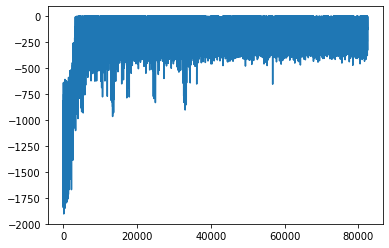

In [4]:
for _ in trange(3000 * 2):
    '''
    100/100 [00:39<00:00,  2.55it/s]
    1000/1000 [05:58<00:00,  2.79it/s]
    3000/3000 [19:25<00:00,  2.58it/s]
    '''
    
    agent.step_train()

plt.plot(agent.sampler.ep_total_reward_list)
plt.show()

0.000314852


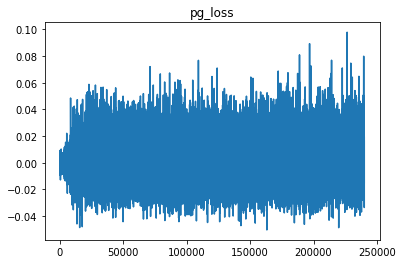

5.9605083


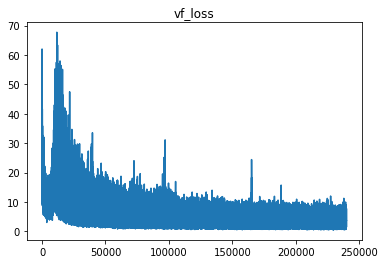

1.1202842


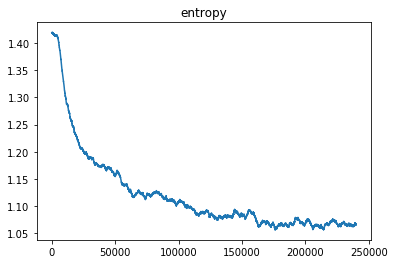

0.0019683612


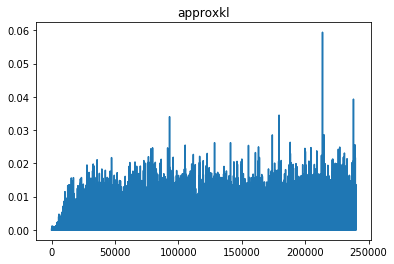

0.017488217


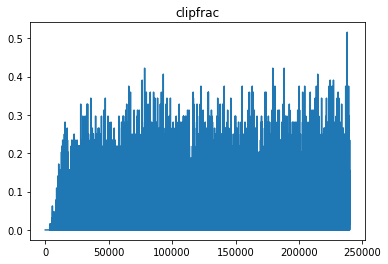

In [6]:
for k, name in zip(range(5), 'pg_loss, vf_loss, entropy, approxkl, clipfrac'.split(', ')):
    plt.title(name)
    plt.plot([i[k] for i in agent.mblossvals])
    print(np.mean(([i[k] for i in agent.mblossvals])))
    plt.show()